In [1]:
import sys
sys.path.append(r"/mnt/ceph/users/tudomlumleart/00_VirtualEnvironments/teeu/lib/python3.10/site-packages")
sys.path.append(r"/mnt/home/tudomlumleart/.local/lib/python3.10/site-packages/")
sys.path.append(r"/mnt/home/tudomlumleart/ceph/00_VirtualEnvironments/jupyter-gpu/lib/python3.10/site-packages")
from utils import *
from functions import *
from _polychrom import *

2024-07-31 11:11:14.070217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
column_names = ['chrom', 'chromStart', 'chromEnd', 'name', 'score',
              'strand', 'signalValue', 'pValue', 'qValue', 'peak']

chrom = 'chr17'
coord = [68066461, 72018460]

In [3]:
ctcf_esc_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/ctcf_chip_esc.bed'
ctcf_cnc_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/ctcf_chip_cnc.bed'

In [4]:
ctcf_esc_df = pd.read_csv(ctcf_esc_path, sep='\t', header=None)
ctcf_cnc_df = pd.read_csv(ctcf_cnc_path, sep='\t', header=None)
ctcf_esc_df.columns = column_names
ctcf_cnc_df.columns = column_names

In [5]:
condition = lambda df: (df.chrom == chrom) & (df.chromStart >= coord[0]) & (df.chromEnd <= coord[1]) & (df.score == 1000)

In [6]:
ctcf_esc_df = ctcf_esc_df[condition(ctcf_esc_df)]
ctcf_cnc_df = ctcf_cnc_df[condition(ctcf_cnc_df)]

In [7]:
ctcf_esc_df['loc_bin'] = pd.cut(ctcf_esc_df['chromStart'], bins=np.linspace(coord[0], coord[1], 100), labels=False)
ctcf_cnc_df['loc_bin'] = pd.cut(ctcf_cnc_df['chromStart'], bins=np.linspace(coord[0], coord[1], 100), labels=False)

In [8]:
def logistic_function(x):
    # this make sure that the boundary between two tads are strong
    mean = x.signalValue[x.signalValue < 1000].median()
    slope = 1e-3
    return 1/(1 + np.exp(-slope*(x.signalValue-mean)))

In [9]:
ctcf_esc_df['BEprob'] = logistic_function(ctcf_esc_df)
ctcf_cnc_df['BEprob'] = logistic_function(ctcf_cnc_df)

In [10]:
ctcf_combined = pd.merge(ctcf_esc_df, ctcf_cnc_df, on='loc_bin', suffixes=('_esc', '_cnc'))
ctcf_combined.head()
ctcf_combined.BEprob_cnc
ctcf_combined.BEprob_esc

0      0.534947
1      0.534947
2      0.534947
3      0.504304
4      0.504304
         ...   
103    0.493584
104    0.492502
105    0.492502
106    0.488905
107    0.488905
Name: BEprob_esc, Length: 108, dtype: float64

<Axes: xlabel='loc_bin', ylabel='BEprob_esc'>

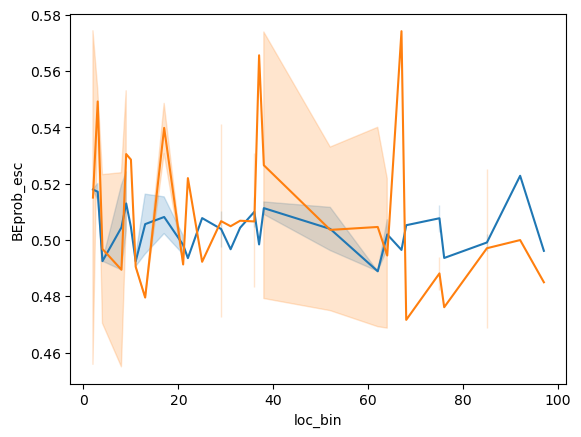

In [11]:
sns.lineplot(data=ctcf_combined, x='loc_bin', y='BEprob_esc')
sns.lineplot(data=ctcf_combined, x='loc_bin', y='BEprob_cnc')

In [12]:
ctcf_esc_df[ctcf_esc_df.signalValue > ctcf_esc_df.signalValue.quantile(0.75)]


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,loc_bin,BEprob
390,chr17,68436463,68436708,.,1000,.,209.29105,-1.0,5.12513,120,9,0.534947
1012,chr17,68759942,68760190,.,1000,.,191.63930,-1.0,5.12513,117,17,0.530553
3796,chr17,71764583,71764824,.,1000,.,160.71257,-1.0,5.12513,126,92,0.522843
5433,chr17,68200855,68201078,.,1000,.,149.73773,-1.0,5.12513,110,3,0.520105
5813,chr17,68399096,68399338,.,1000,.,147.53770,-1.0,5.12513,120,8,0.519555
6931,chr17,68172477,68172698,.,1000,.,141.16181,-1.0,5.12513,111,2,0.517964
7519,chr17,69523346,69523573,.,1000,.,138.05277,-1.0,5.12513,116,36,0.517187
7730,chr17,69526059,69526272,.,1000,.,137.14036,-1.0,5.12513,111,36,0.516960
8236,chr17,68614031,68614244,.,1000,.,134.54037,-1.0,5.12513,105,13,0.516310
9829,chr17,68205307,68205539,.,1000,.,126.21123,-1.0,5.12513,114,3,0.514230


In [13]:
ctcf_cnc_df[ctcf_cnc_df.signalValue > ctcf_cnc_df.signalValue.quantile(0.75)]

,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,loc_bin,BEprob
3278,chr17,68172357,68172854,.,1000,.,498.77202,-1.0,5.02876,238,2,0.574364
3305,chr17,70766998,70767513,.,1000,.,498.17622,-1.0,5.02876,287,67,0.574218
3373,chr17,69607109,69607544,.,1000,.,497.02419,-1.0,5.02876,223,38,0.573937
4567,chr17,70636503,70636977,.,1000,.,475.21745,-1.0,5.02876,210,64,0.568596
5284,chr17,69568982,69569452,.,1000,.,463.25725,-1.0,5.02876,219,37,0.565660
5882,chr17,68436258,68436807,.,1000,.,453.39591,-1.0,5.02876,309,9,0.563235
6389,chr17,70144181,70144694,.,1000,.,445.60674,-1.0,5.02876,249,52,0.561318
7209,chr17,68759835,68760265,.,1000,.,432.35680,-1.0,5.02876,228,17,0.558053
8203,chr17,69525950,69526394,.,1000,.,417.68823,-1.0,5.02876,220,36,0.554432
8367,chr17,68205199,68205637,.,1000,.,415.11581,-1.0,5.02876,225,3,0.553797


In [14]:
save_folder_esc = '/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/ESC'
save_folder_cnc = '/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/CNC'

In [18]:
# Test generating polymers
num_monomers = 100
num_polymers = 1
num_observations = 500 # per template
ctcf_sites = ctcf_combined.loc_bin.values
ctcf_stall_probs = ctcf_combined.BEprob_esc.values 

(array([2., 2., 2., 1., 0., 0., 2., 3., 1., 1., 0., 1., 0., 0., 0., 4., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 4., 0., 1., 0., 1., 0.,
        0., 4., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 5., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 2.  ,  2.95,  3.9 ,  4.85,  5.8 ,  6.75,  7.7 ,  8.65,  9.6 ,
        10.55, 11.5 , 12.45, 13.4 , 14.35, 15.3 , 16.25, 17.2 , 18.15,
        19.1 , 20.05, 21.  , 21.95, 22.9 , 23.85, 24.8 , 25.75, 26.7 ,
        27.65, 28.6 , 29.55, 30.5 , 31.45, 32.4 , 33.35, 34.3 , 35.25,
        36.2 , 37.15, 38.1 , 39.05, 40.  , 40.95, 41.9 , 42.85, 43.8 ,
        44.75, 45.7 , 46.65, 47.6 , 48.55, 49.5 , 50.45, 51.4 , 52.35,
        53.3 , 54.25, 55.2 , 56.15, 57.1 , 58.05, 59.  , 59.95, 60.9 ,
        61.85, 62.8 , 63.75, 64.7 , 65.65, 66.6 , 67.

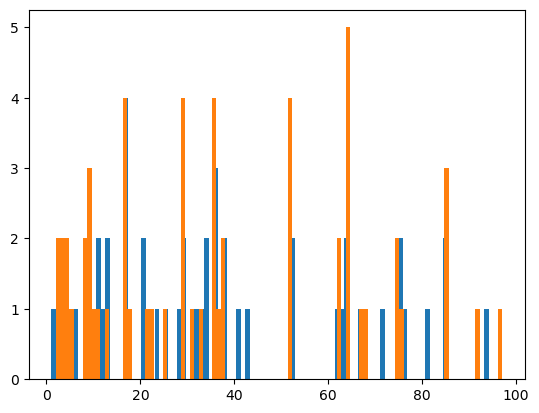

In [16]:
plt.hist(ctcf_esc_df.loc_bin, 100)
plt.hist(ctcf_cnc_df.loc_bin, 100)

In [19]:
generate_polymer_chain(num_monomers, num_polymers, 
                       num_observations, save_folder_esc,
                       ctcf_sites=ctcf_sites, ctcf_stall_probs=ctcf_stall_probs,
                       num_templates=1)


[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01]]
LEF count: 10
interaction matrix:
[[0]]
monomer types:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/ESC/


  0%|          | 0/1 [00:00<?, ?it/s]

/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/ESC/template_0/LEFPos.h5
creating folder
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 29 29 64 64 64 64 64 64 64 64 64 64 25 68 10 33 85 85 85 85 85 85 21 21
 37 31 67 97 11 11 76 22  4  4 62 62]
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 29 29 64 64 64 64 64 64 64 64 64 64 25 68 10 33 85 85 85 85 85 85 21 21
 37 31 67 97 11 11 76 22  4  4 62 62]
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 2

INFO:root:Performing local energy minimization
INFO:root:adding force harmonic_bonds 0
INFO:root:adding force angle 1
INFO:root:adding force heteropolymer_SSW 2


Exclude neighbouring chain particles from heteropolymer_SSW
Number of exceptions: 99


INFO:root:Particles loaded. Potential energy is 40.378322
INFO:root:before minimization eK=1.3877615597471151, eP=40.37832239236681, time=0.0 ps
INFO:root:Particles loaded. Potential energy is 0.642169
INFO:root:after minimization eK=1.3877615597471151, eP=0.5179332375608287, time=0.0 ps
INFO:root:block    0 pos[1]=[6.7 -6.2 35.2] dr=31.81 t=8581.9ps kin=2.42 pot=3.09 Rg=3.248 SPS=25684 dt=93.8fs dx=32.61pm 
INFO:root:block    1 pos[1]=[-3.7 -26.4 27.8] dr=21.02 t=17201.0ps kin=2.25 pot=2.16 Rg=3.786 SPS=26688 dt=110.2fs dx=36.91pm 
INFO:root:block    2 pos[1]=[5.8 -42.1 31.9] dr=20.58 t=25831.1ps kin=2.09 pot=2.55 Rg=3.874 SPS=26409 dt=120.9fs dx=39.01pm 
INFO:root:block    3 pos[1]=[-4.1 -38.4 -4.8] dr=32.97 t=34426.1ps kin=2.47 pot=2.64 Rg=3.359 SPS=28236 dt=103.4fs dx=36.28pm 
INFO:root:block    4 pos[1]=[-24.4 -14.3 4.8] dr=29.19 t=43022.2ps kin=2.10 pot=2.49 Rg=3.754 SPS=26440 dt=105.0fs dx=34.04pm 
INFO:root:block    5 pos[1]=[-3.5 -9.6 -6.2] dr=27.05 t=51730.2ps kin=2.52 pot=2.

In [20]:

ctcf_sites = ctcf_combined.loc_bin.values
ctcf_stall_probs = ctcf_combined.BEprob_cnc.values 

generate_polymer_chain(num_monomers, num_polymers, 
                       num_observations, save_folder_cnc,
                       ctcf_sites=ctcf_sites, ctcf_stall_probs=ctcf_stall_probs,
                       num_templates=1)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01]]
LEF count: 10
interaction matrix:
[[0]]
monomer types:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/CNC/


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:Performing local energy minimization
INFO:root:adding force harmonic_bonds 0
INFO:root:adding force angle 1
INFO:root:adding force heteropolymer_SSW 2


/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_Sox9_Shared/CNC/template_0/LEFPos.h5
creating folder
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 29 29 64 64 64 64 64 64 64 64 64 64 25 68 10 33 85 85 85 85 85 85 21 21
 37 31 67 97 11 11 76 22  4  4 62 62]
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 29 29 64 64 64 64 64 64 64 64 64 64 25 68 10 33 85 85 85 85 85 85 21 21
 37 31 67 97 11 11 76 22  4  4 62 62]
[ 9  9  9  9  9  9  9  9  9 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 92  3  3  3  3  8  8  8  8  2  2 36 36 36 36 36 36 36 36 36 36 36 36
 13 13 52 52 52 52 52 52 52 52 38 38 38 38 75 75 75 75 29 29 29 29 29 29
 2

INFO:root:Particles loaded. Potential energy is 91.324842
INFO:root:before minimization eK=1.4285475548671267, eP=91.3248422982796, time=0.0 ps
INFO:root:Particles loaded. Potential energy is 0.629693
INFO:root:after minimization eK=1.4285475548671267, eP=0.5025031415199465, time=0.0 ps
INFO:root:block    0 pos[1]=[15.4 22.0 14.2] dr=8.83 t=8614.1ps kin=1.86 pot=2.03 Rg=4.337 SPS=10146 dt=113.0fs dx=34.47pm 
INFO:root:block    1 pos[1]=[18.2 9.8 19.6] dr=15.22 t=17165.3ps kin=1.89 pot=2.17 Rg=4.609 SPS=11505 dt=112.5fs dx=34.53pm 
INFO:root:block    2 pos[1]=[1.8 26.0 21.5] dr=19.97 t=25759.9ps kin=2.06 pot=2.13 Rg=4.226 SPS=9523 dt=105.3fs dx=33.76pm 
INFO:root:block    3 pos[1]=[6.5 8.0 35.3] dr=19.77 t=34387.7ps kin=2.66 pot=2.45 Rg=4.506 SPS=10122 dt=101.3fs dx=36.94pm 
INFO:root:block    4 pos[1]=[-22.3 8.4 34.7] dr=29.70 t=42960.3ps kin=2.21 pot=2.33 Rg=4.400 SPS=10709 dt=109.5fs dx=36.32pm 
INFO:root:block    5 pos[1]=[-30.5 28.7 29.1] dr=21.90 t=51513.2ps kin=2.14 pot=2.40 Rg=4